In [1]:
! pip install plotnine pandas mizani

# https://medium.com/@pablosjv/importing-local-python-modules-into-jupyter-notebooks-87336b2d7746
%load_ext autoreload
%autoreload 2


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

from data import csv_data_add_histogram, csv_data_search_histogram

#csv_data

# Calculate additional columns:
# csv_data_add_histogram['Rate'] = 1.0 * 1_000_000_000 / csv_data_add_histogram['Start Duration Inclusive']

# Split the class into parts:
# https://practicaldatascience.co.uk/data-science/how-to-split-strings-using-the-pandas-split-function#:~:text=The%20split()%20function%20has,times%20to%20split%20the%20string.
csv_data_add_histogram[['Class Info', 'Algorithm Test']] = csv_data_add_histogram['Class'].str.split(pat='$', expand=True)
csv_data_add_histogram['Algorithm'] = csv_data_add_histogram['Algorithm Test'].str.replace('Tests', '')

# Remove warmup data:
csv_data_add_histogram = csv_data_add_histogram[csv_data_add_histogram['Scenario'] != 'Warmup']


csv_data_add_histogram


,Class,Test,Display,Timestamp,Queries,Range,Item Count,Scenario,Start Duration Inclusive,End Duration Exclusive,Count,file,Class Info,Algorithm Test,Algorithm
25,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,0.000000e+00,0.000000e+00,163,2023-12-28-20-50-43_index_Random_Gaussian.add....,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
26,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,1.000000e+02,1.023293e+02,812,2023-12-28-20-50-43_index_Random_Gaussian.add....,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
27,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,1.995262e+02,2.041738e+02,24,2023-12-28-20-50-43_index_Random_Gaussian.add....,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
28,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,6.025596e+02,6.165950e+02,1,2023-12-28-20-50-43_index_Random_Gaussian.add....,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
29,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[3] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,2000,Tiny Some,0.000000e+00,0.000000e+00,227,2023-12-28-20-50-43_index_Random_Gaussian.add....,io.nanovc.indexing.examples.x.XIndex1DTests,BinaryTreeTests,BinaryTree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57630,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T22:44:28.4570698,10000,1000000.0,10000000,Huge Some,8.128305e+07,8.317638e+07,1,2023-12-28-22-44-28_index_Random_Linear.add.hi...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
57631,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T22:44:28.4570698,10000,1000000.0,10000000,Huge Some,8.709636e+07,8.912509e+07,3,2023-12-28-22-44-28_index_Random_Linear.add.hi...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
57632,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T22:44:28.4570698,10000,1000000.0,10000000,Huge Some,9.332543e+07,9.549926e+07,1,2023-12-28-22-44-28_index_Random_Linear.add.hi...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo
57633,io.nanovc.indexing.examples.x.XIndex1DTests$Re...,index_Random_Linear,[38] Random Linear Sampling Scenario = Huge So...,2023-12-28T22:44:28.4570698,10000,1000000.0,10000000,Huge Some,9.772372e+07,1.000000e+08,1,2023-12-28-22-44-28_index_Random_Linear.add.hi...,io.nanovc.indexing.examples.x.XIndex1DTests,RepoTests,Repo


In [68]:
from numpy import log

# https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_tile.html#annotated-heatmap

scenarios = csv_data_add_histogram['Scenario'].unique()

plot_data = csv_data_add_histogram.copy()

plot_data['scenario'] = pd.Categorical(plot_data['Scenario'], categories = scenarios)

# Make sure we don't have zero durations (causes issues with log plots)
plot_data['Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['Start Duration'] = plot_data['Start Duration Inclusive'].map(lambda v: 1 if v <= 0 else v)
plot_data['End Duration'] = plot_data['End Duration Exclusive'].map(lambda v: 10.0 if v <= 0 else v)

# Work out more fields:
plot_data['Rate'] = plot_data['Duration'].map(lambda v: 1.0 / v)
plot_data['Count Ratio'] = plot_data['Count'] / plot_data['Item Count']
plot_data['Count Log'] = log(plot_data['Count'])
plot_data['Count Ratio Log'] = log(plot_data['Count Ratio'])

plot_data.head()




,Class,Test,Display,Timestamp,Queries,Range,Item Count,Scenario,Start Duration Inclusive,End Duration Exclusive,...,Algorithm Test,Algorithm,scenario,Duration,Start Duration,End Duration,Rate,Count Ratio,Count Log,Count Ratio Log
25,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,0.000000,0.000000,...,BinaryTreeTests,BinaryTree,Tiny Some,1.000000,1.000000,10.000000,1.000000,0.1630,5.093750,-1.814005
26,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,100.000000,102.329299,...,BinaryTreeTests,BinaryTree,Tiny Some,100.000000,100.000000,102.329299,0.010000,0.8120,6.699500,-0.208255
27,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,199.526231,204.173794,...,BinaryTreeTests,BinaryTree,Tiny Some,199.526231,199.526231,204.173794,0.005012,0.0240,3.178054,-3.729701
28,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[2] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,1000,Tiny Some,602.559586,616.595002,...,BinaryTreeTests,BinaryTree,Tiny Some,602.559586,602.559586,616.595002,0.001660,0.0010,0.000000,-6.907755
29,io.nanovc.indexing.examples.x.XIndex1DTests$Bi...,index_Random_Gaussian,[3] Random Gaussian Sampling Scenario = Tiny S...,2023-12-28T20:50:43.7744886,10000,1000000.0,2000,Tiny Some,0.000000,0.000000,...,BinaryTreeTests,BinaryTree,Tiny Some,1.000000,1.000000,10.000000,1.000000,0.1135,5.424950,-2.175952


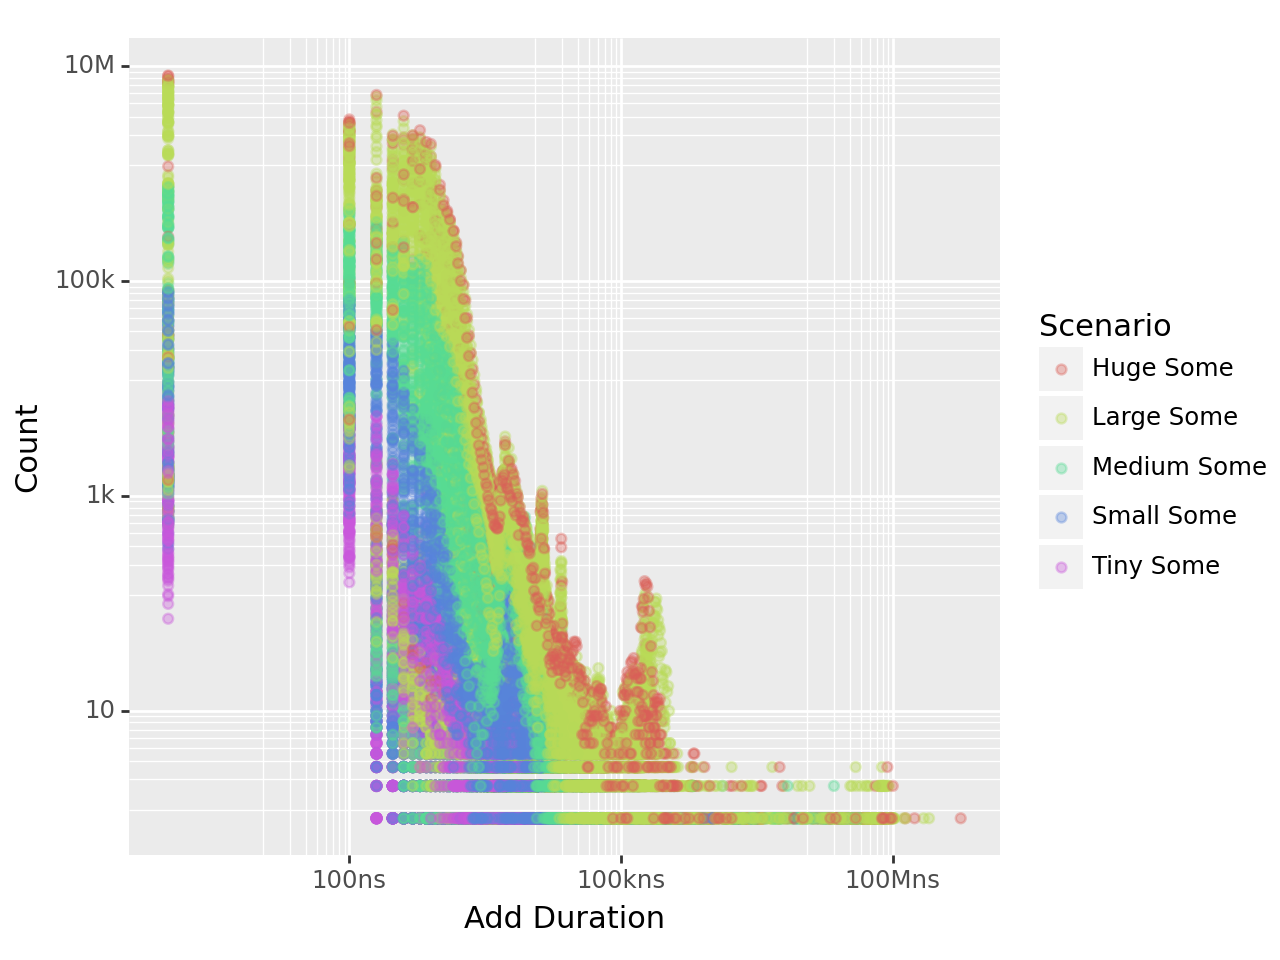

<Figure Size: (640 x 480)>

In [12]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_smooth, labs, scale_y_continuous, ggplot, \
    aes, geom_point

(ggplot(plot_data, aes(x="Duration", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix="ns"))
 #+ scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix="/s"))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 )

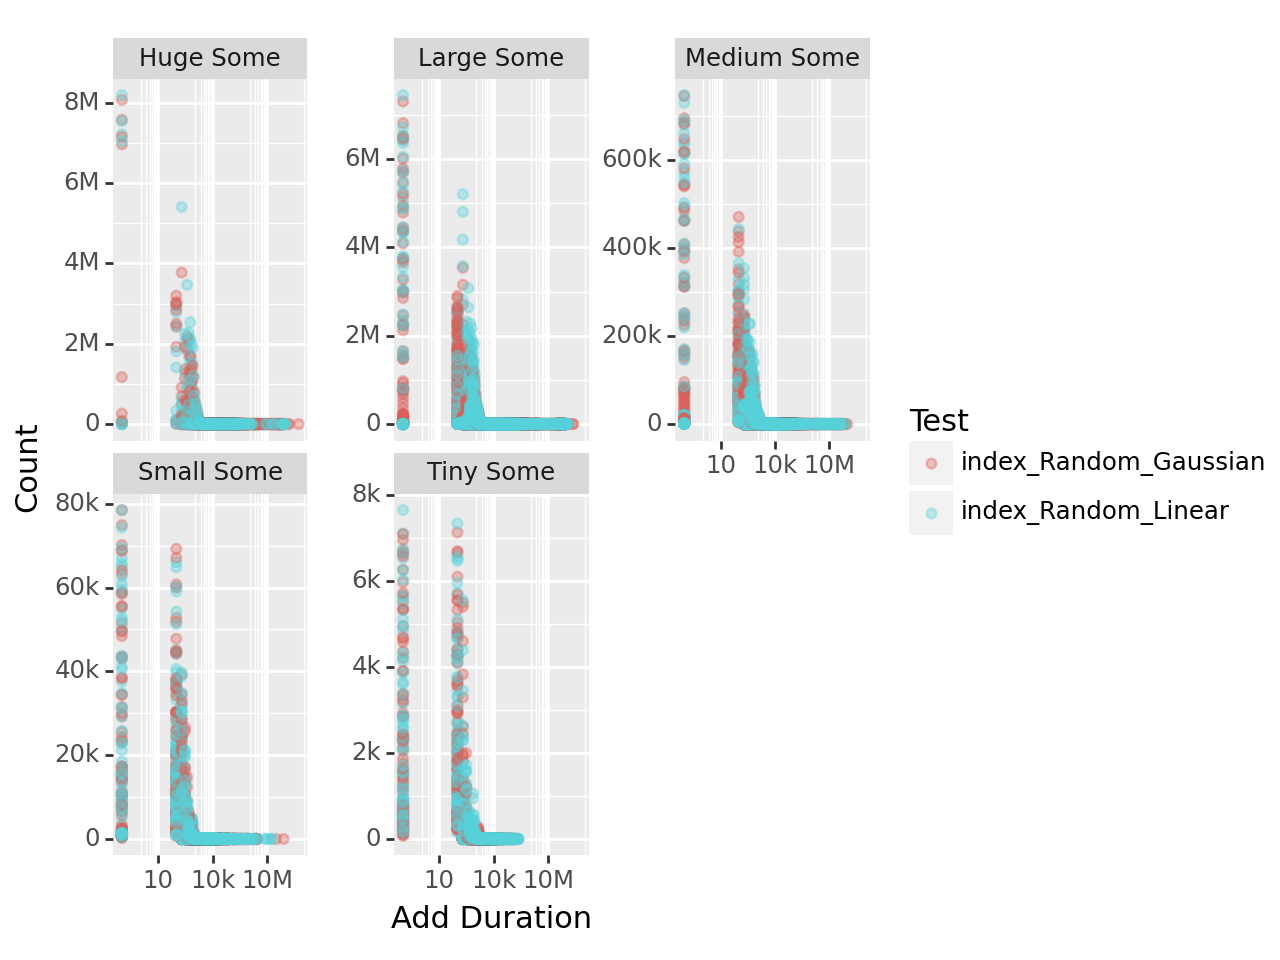

<Figure Size: (640 x 480)>

In [19]:

from formatters.number_suffix_format import number_suffix_format
from plotnine import ggplot, scale_x_log10, geom_smooth, labs, scale_y_continuous, facet_wrap

(ggplot(plot_data, aes(x="Duration", y="Count", color="Test"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + facet_wrap("Scenario", scales="free_y")
 + labs(x='Add Duration', y='Count')
 )

2k


C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


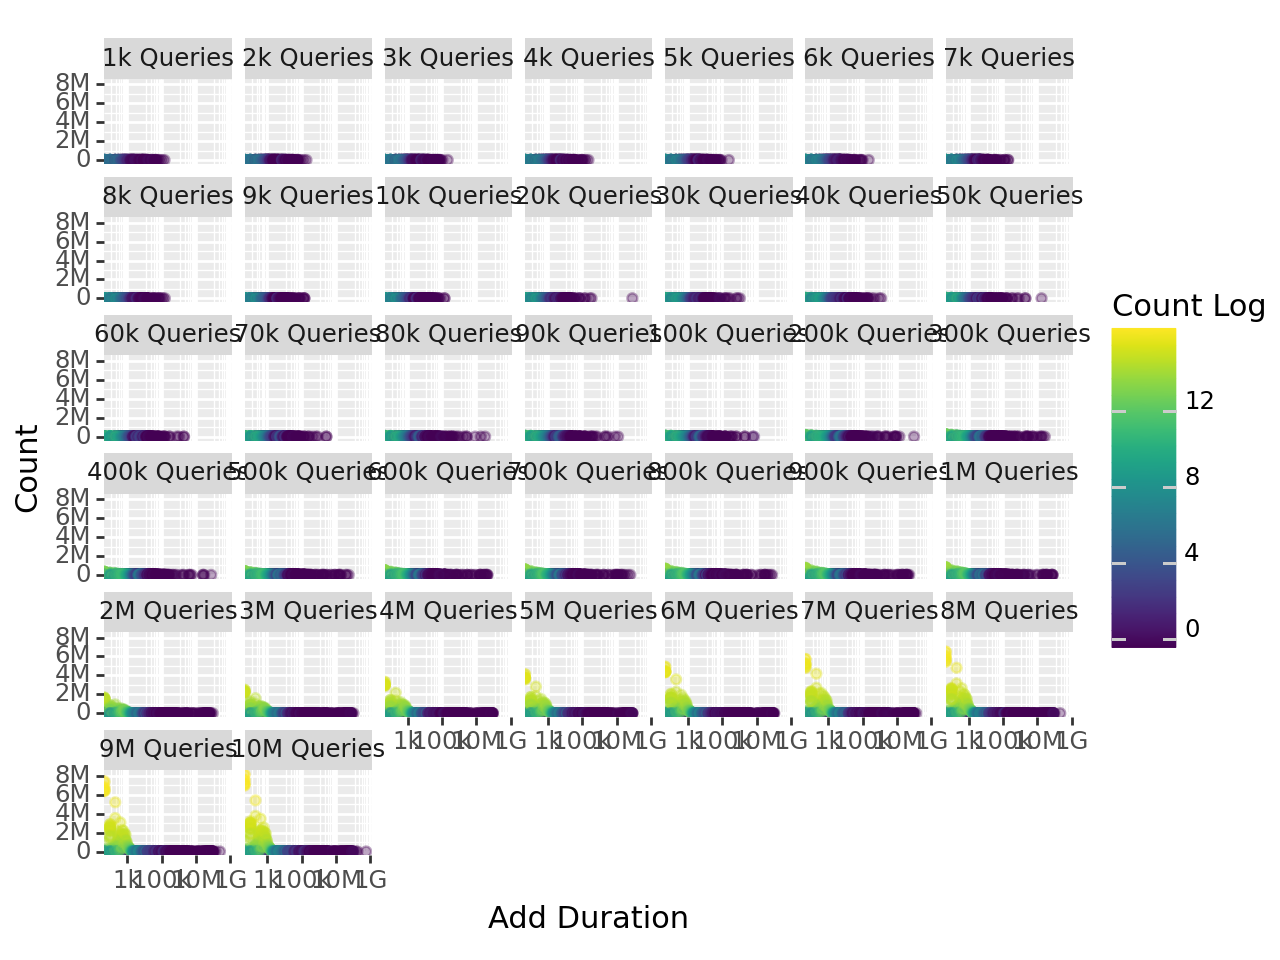

<Figure Size: (640 x 480)>

In [39]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, geom_smooth, labs, scale_y_continuous, \
    facet_grid

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


pretty_Format = number_suffix_format(fmt="{:.0f}")

print (pretty_Format([2134])[0])

def pretty_labeller(x):
    return pretty_Format([int(x)])[0] + " Queries"

(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Count Log"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 #+ facet_grid("Item Count ~ .", labeller=pretty_labeller)
 + facet_wrap("Item Count", labeller=pretty_labeller)
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


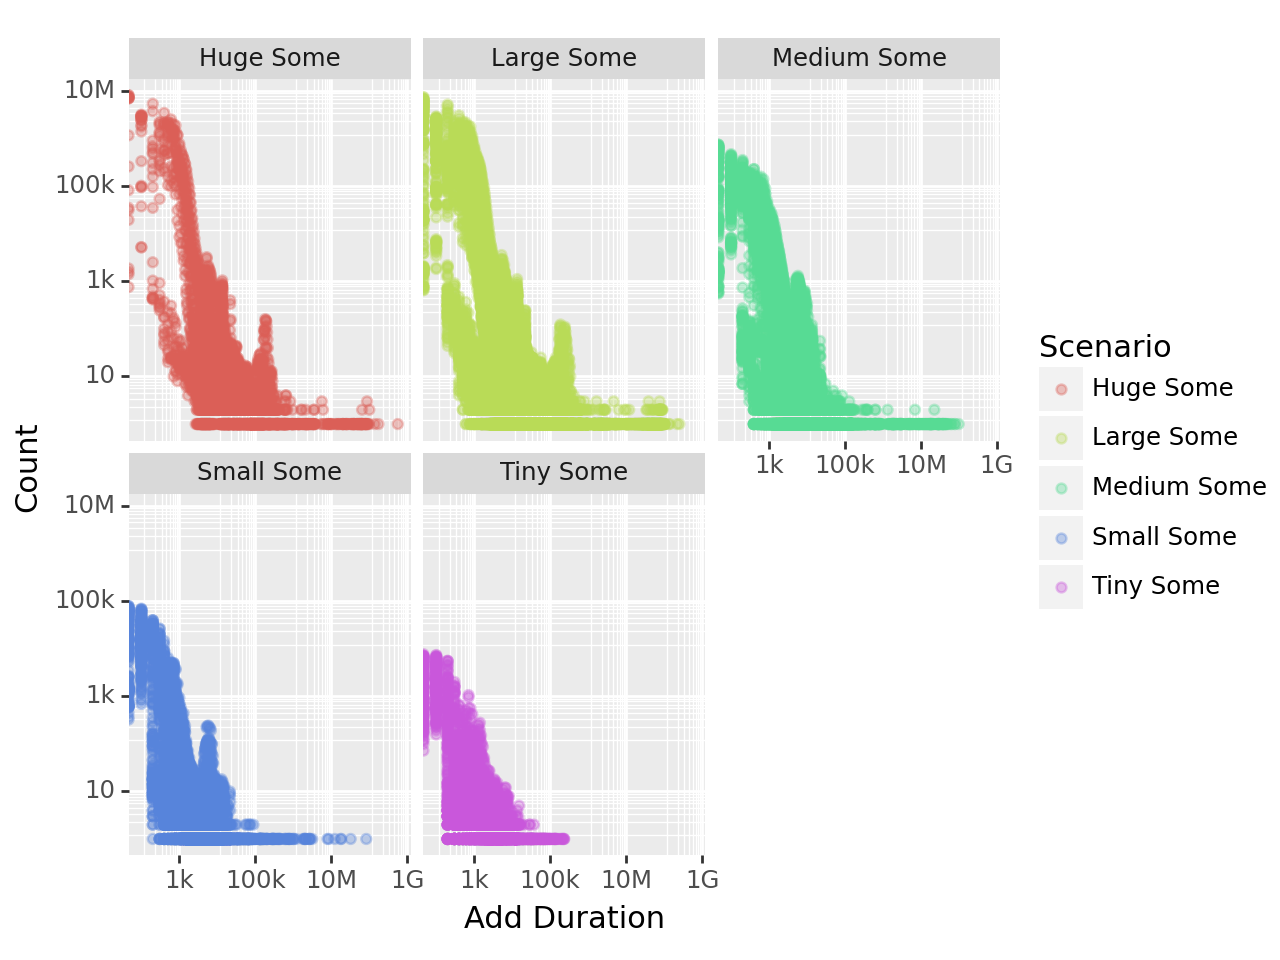

<Figure Size: (640 x 480)>

In [8]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_point, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Scenario"))
 + geom_point(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

C:\Source\nanovc-java-kdrepo\venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10


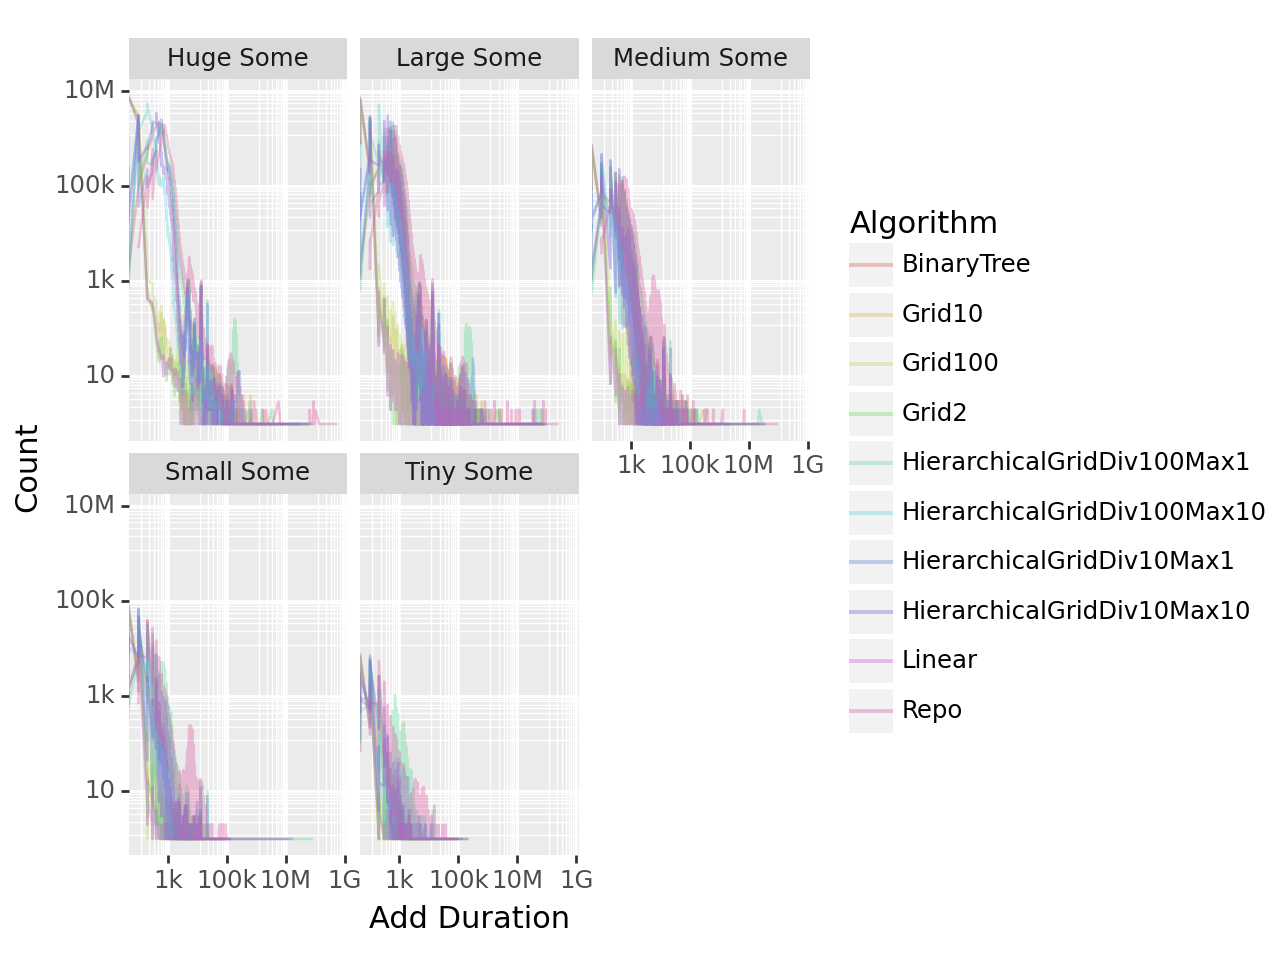

<Figure Size: (640 x 480)>

In [9]:
from formatters.number_suffix_format import number_suffix_format
from plotnine import scale_x_log10, scale_y_log10, geom_line, geom_smooth, labs, scale_y_continuous, \
    facet_wrap

# Facetting:
# https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html


(ggplot(plot_data, aes(x="Start Duration Inclusive", y="Count", color="Algorithm"))
 + geom_line(alpha=0.35)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 #+ scale_color_discrete(l=.4)
 #+ geom_smooth()
 + labs(x='Add Duration', y='Count')
 + facet_wrap("Scenario")
 )

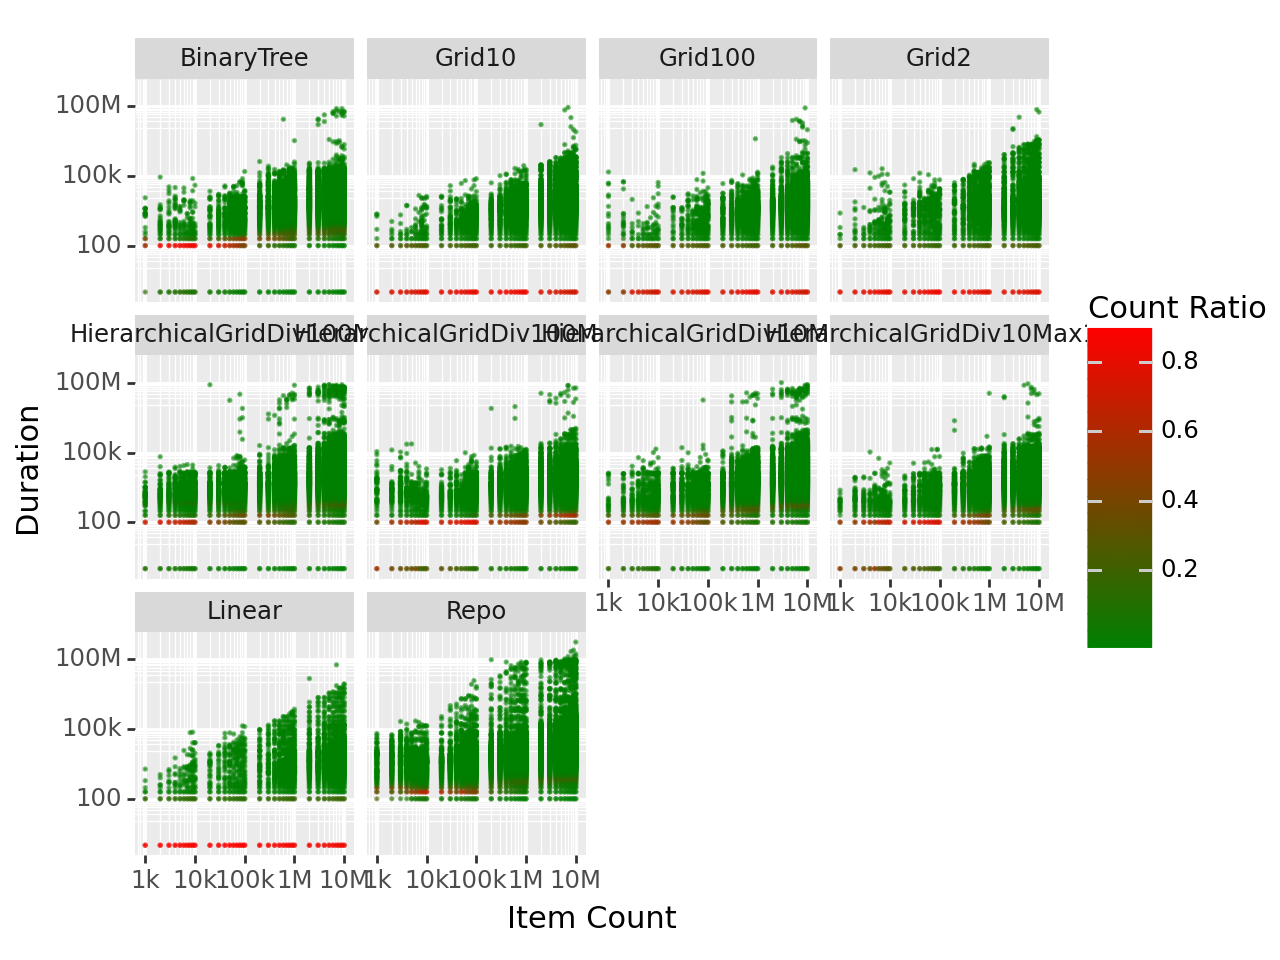

<Figure Size: (640 x 480)>

In [65]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio'))
 + geom_point(size=0.1, alpha=0.5)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm")
 )

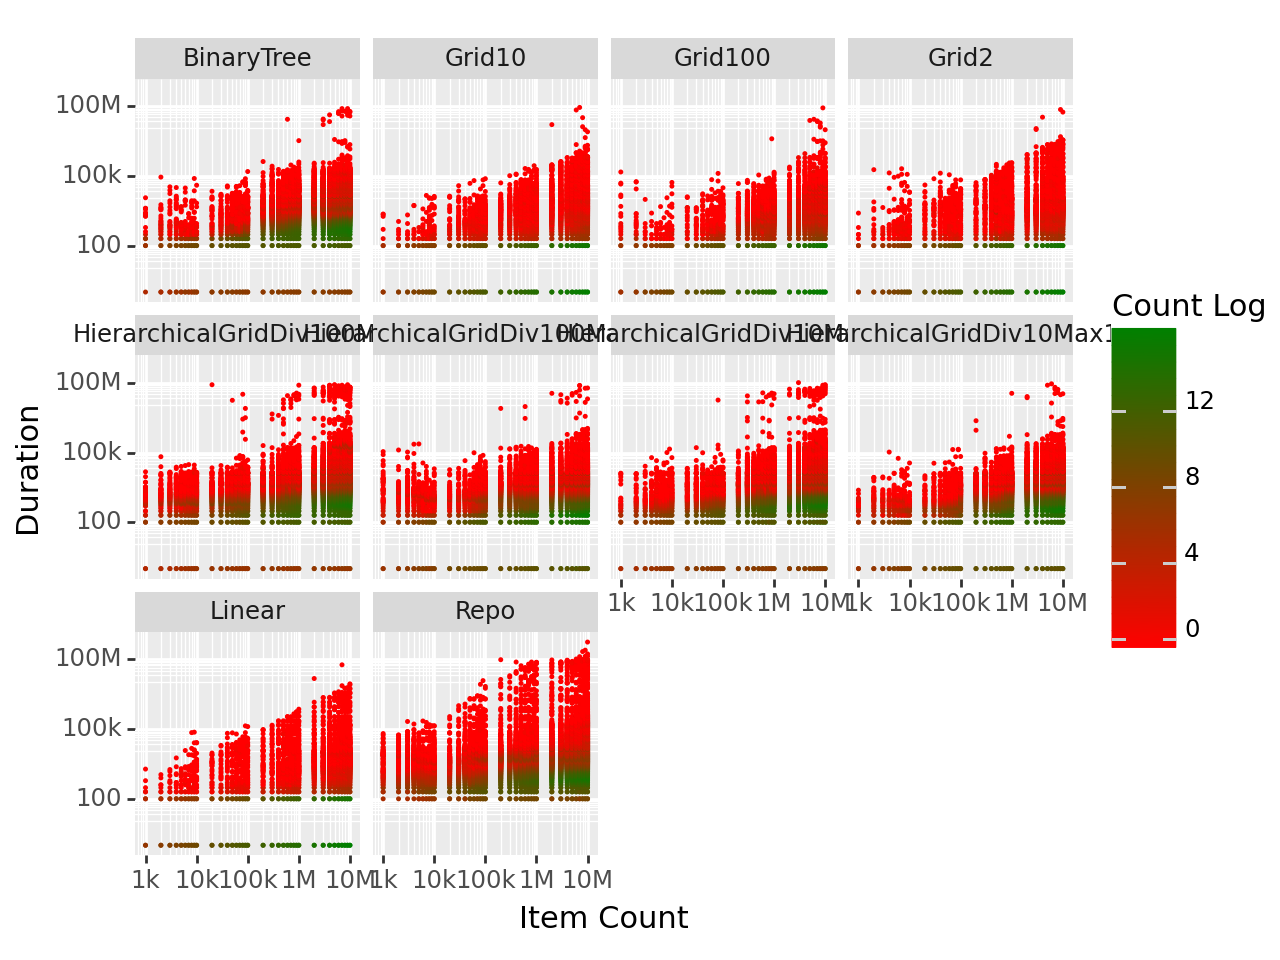

<Figure Size: (640 x 480)>

In [61]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Log', fill='Count Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='red', high='green')
 + scale_fill_gradient(low='red', high='green')
 + facet_wrap("Algorithm")
 )


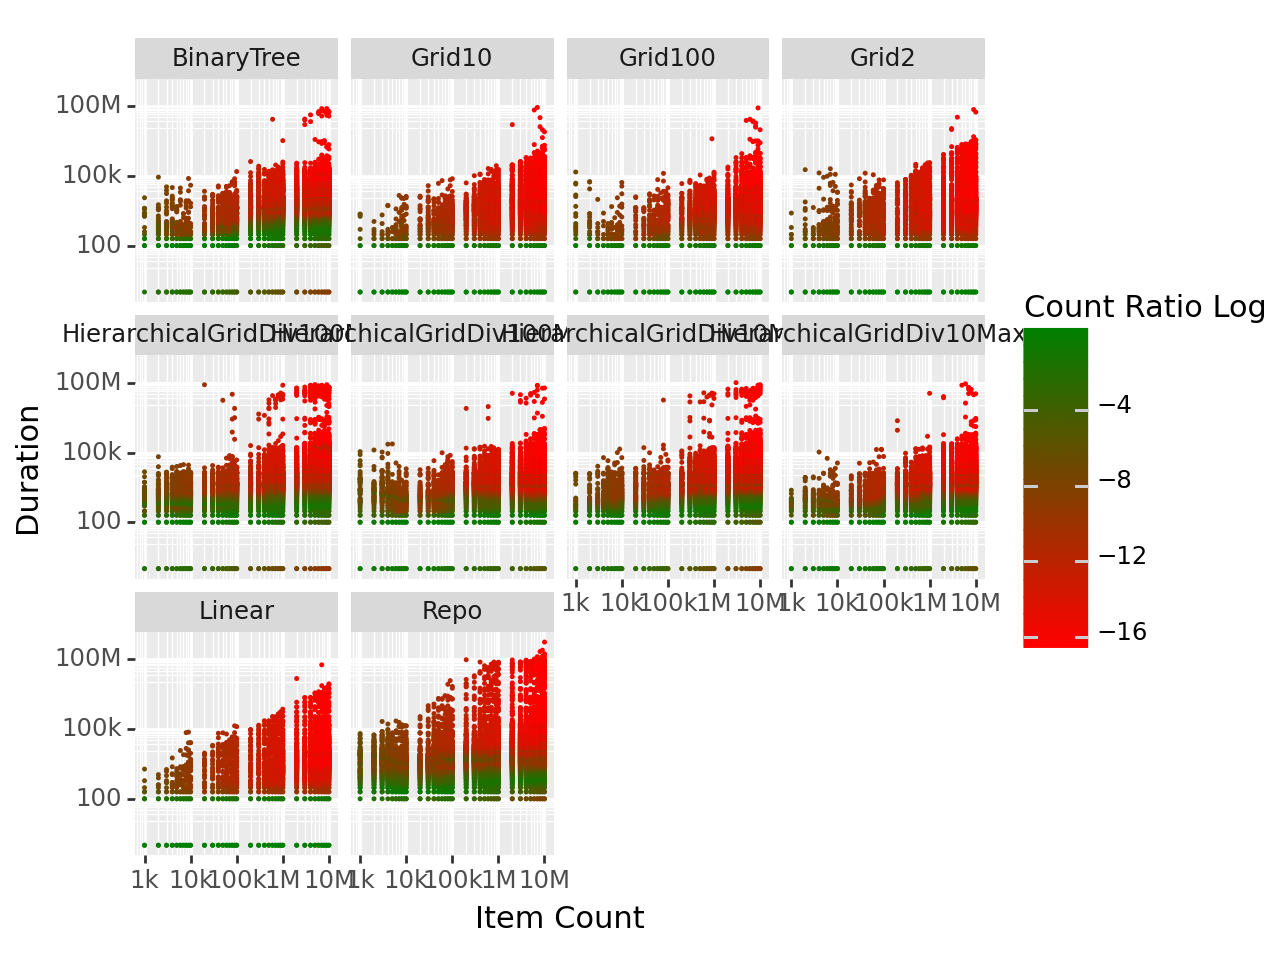

<Figure Size: (640 x 480)>

In [69]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

(ggplot(plot_data, aes('Item Count', 'Duration', color='Count Ratio Log', fill='Count Ratio Log'))
 + geom_point(size=0.01, alpha=1.0)
 #+ geom_tile(aes(width=.95, height=.95))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='red', high='green')
 + scale_fill_gradient(low='red', high='green')
 + facet_wrap("Algorithm")
 )


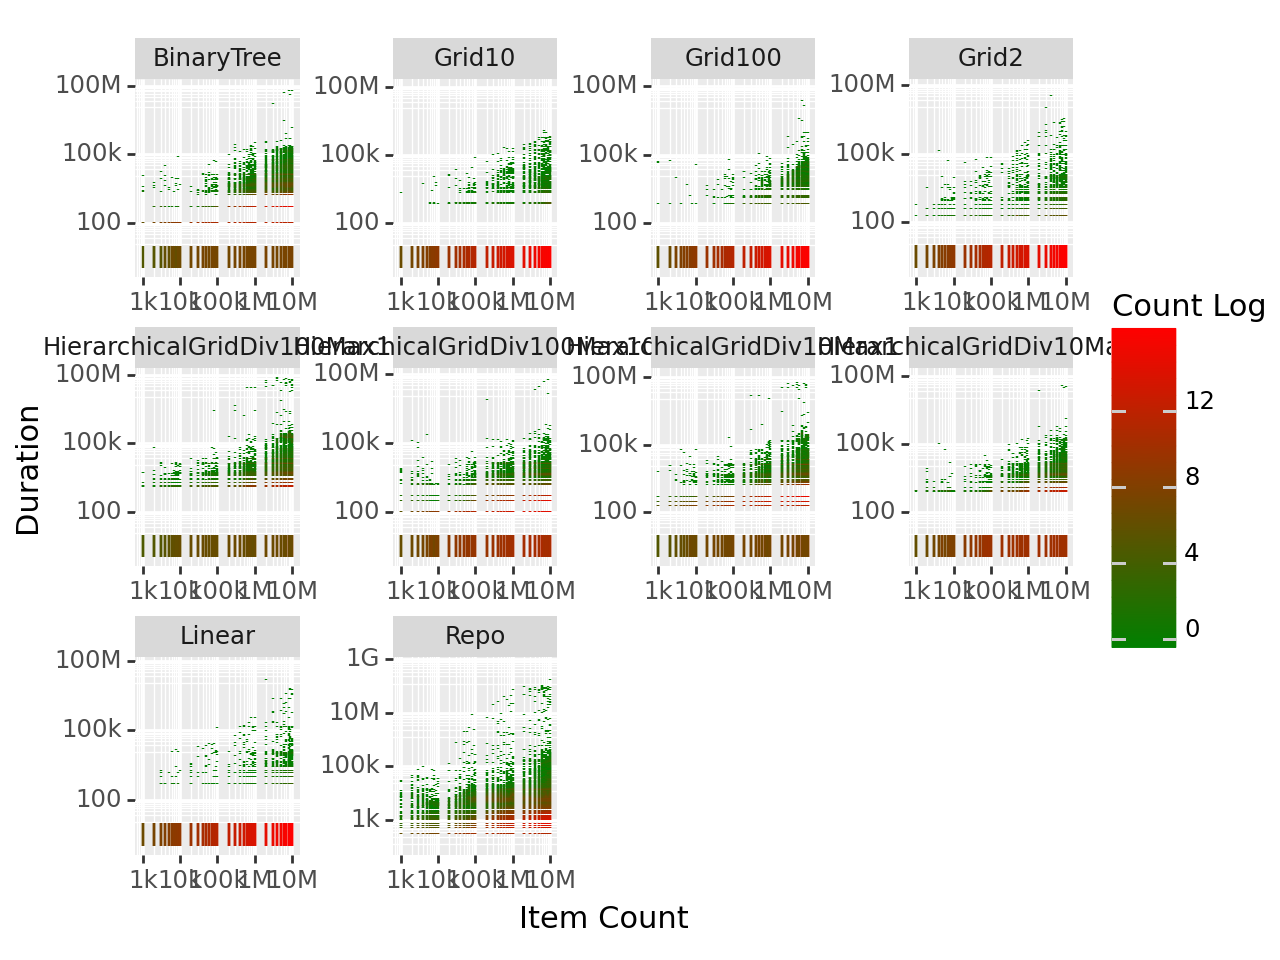

<Figure Size: (640 x 480)>

In [59]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

# https://ggplot2.tidyverse.org/reference/geom_tile.html
# geom_rect() and geom_tile() do the same thing, but are parameterised differently: geom_rect() uses the locations of the four corners (xmin, xmax, ymin and ymax), while geom_tile() uses the center of the tile and its size (x, y, width, height). geom_raster() is a high performance special case for when all the tiles are the same size. 
 
(ggplot(plot_data, aes("Item Count", "Duration"))
 + geom_rect(aes(xmin='Item Count', xmax='Item Count', ymin='Start Duration',ymax='End Duration', color='Count Log'))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
# + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
# + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm", scales="free")
 )

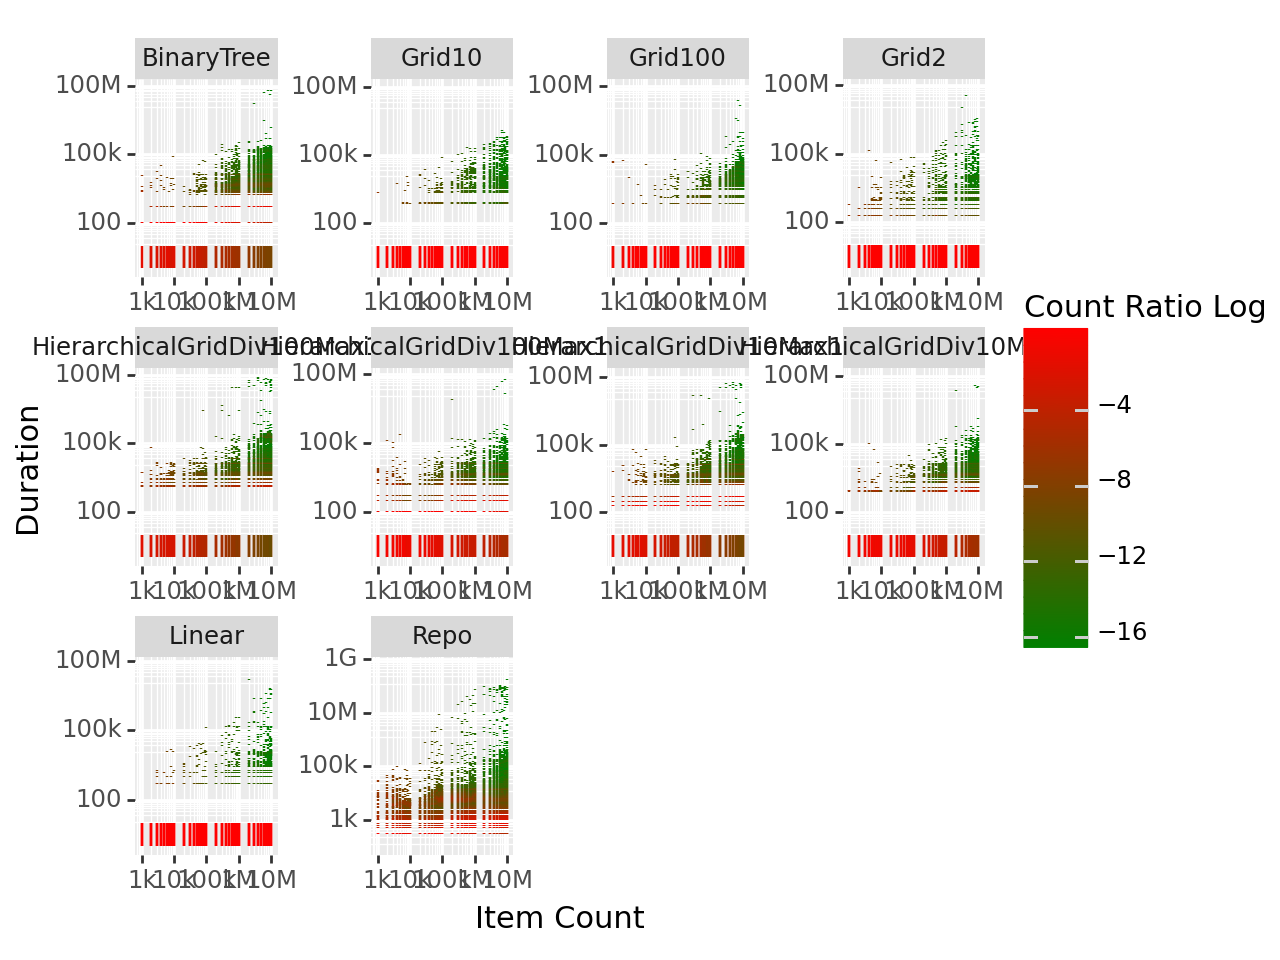

<Figure Size: (640 x 480)>

In [70]:
from plotnine import geom_tile, geom_text, geom_raster, geom_rect, scale_x_continuous, scale_fill_gradient, \
    scale_color_gradient, scale_color_gradient2

# https://ggplot2.tidyverse.org/reference/geom_tile.html
# geom_rect() and geom_tile() do the same thing, but are parameterised differently: geom_rect() uses the locations of the four corners (xmin, xmax, ymin and ymax), while geom_tile() uses the center of the tile and its size (x, y, width, height). geom_raster() is a high performance special case for when all the tiles are the same size. 

(ggplot(plot_data, aes("Item Count", "Duration"))
 + geom_rect(aes(xmin='Item Count', xmax='Item Count', ymin='Start Duration',ymax='End Duration', color='Count Ratio Log'))
 #+ geom_text(aes(label='Count'), size=9)
 + scale_x_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_x_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_y_log10(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 # + scale_y_continuous(labels = number_suffix_format(fmt="{:.0f}", suffix=""))
 + scale_color_gradient(low='green', high='red')
 + facet_wrap("Algorithm", scales="free")
 )